In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-behavior-and-churn-simulation-dataset/synthetic_customer_behavior_and_churn.csv


## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/customer-behavior-and-churn-simulation-dataset/synthetic_customer_behavior_and_churn.csv')


## Top values

In [3]:
df.head()

,customer_id,signup_date,tenure_months,age,gender,region,income_level,subscription_type,monthly_charges,total_charges,...,avg_session_duration_minutes,number_of_logins_per_month,number_of_support_tickets,satisfaction_score,payment_method,contract_type,last_login_days_ago,promotional_response,discount_used,churn
0,CUST_000001,2022-08-17,28,47,Male,North America,low,basic,35.22,1034.06,...,55.3,12,1,5,Credit Card,monthly,4,no,yes,0
1,CUST_000002,2022-02-21,34,40,Male,Europe,low,standard,63.56,2065.11,...,25.7,18,1,3,Bank Transfer,yearly,13,no,yes,0
2,CUST_000003,2023-07-18,17,49,Female,Asia Pacific,low,standard,74.37,1248.11,...,9.0,8,6,5,Digital Wallet,monthly,54,no,yes,1
3,CUST_000004,2023-05-17,19,60,Female,Latin America,medium,premium,98.28,1540.50,...,99.4,30,1,3,Credit Card,monthly,6,no,no,0
4,CUST_000005,2023-04-03,20,39,Female,Asia Pacific,medium,standard,61.47,1166.17,...,8.4,8,3,5,Digital Wallet,yearly,59,no,yes,0


## last 5 values

In [4]:
df.tail()

,customer_id,signup_date,tenure_months,age,gender,region,income_level,subscription_type,monthly_charges,total_charges,...,avg_session_duration_minutes,number_of_logins_per_month,number_of_support_tickets,satisfaction_score,payment_method,contract_type,last_login_days_ago,promotional_response,discount_used,churn
14995,CUST_014996,2024-11-16,1,31,Female,Latin America,low,standard,60.82,53.29,...,38.7,13,2,3,Credit Card,monthly,67,no,no,1
14996,CUST_014997,2024-10-11,2,56,Female,Latin America,low,basic,34.68,75.17,...,69.1,23,3,2,PayPal,yearly,83,yes,no,1
14997,CUST_014998,2023-07-24,17,57,Female,North America,low,basic,23.80,350.56,...,31.1,13,2,3,Credit Card,yearly,17,no,no,0
14998,CUST_014999,2023-02-19,22,31,Male,Latin America,medium,standard,67.70,1337.17,...,38.0,16,1,5,Credit Card,yearly,4,yes,no,0
14999,CUST_015000,2023-01-05,23,40,Female,North America,medium,basic,27.14,590.79,...,37.3,17,3,4,Credit Card,yearly,12,no,yes,0


## Data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   15000 non-null  object 
 1   signup_date                   15000 non-null  object 
 2   tenure_months                 15000 non-null  int64  
 3   age                           15000 non-null  int64  
 4   gender                        15000 non-null  object 
 5   region                        15000 non-null  object 
 6   income_level                  15000 non-null  object 
 7   subscription_type             15000 non-null  object 
 8   monthly_charges               15000 non-null  float64
 9   total_charges                 15000 non-null  float64
 10  usage_frequency               15000 non-null  object 
 11  avg_session_duration_minutes  15000 non-null  float64
 12  number_of_logins_per_month    15000 non-null  int64  
 13  n

## summery

In [6]:
df.describe()

,tenure_months,age,monthly_charges,total_charges,avg_session_duration_minutes,number_of_logins_per_month,number_of_support_tickets,satisfaction_score,last_login_days_ago,churn
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,17.448467,41.646933,59.046174,978.208528,45.235633,18.519600,2.927133,3.38440,21.748533,0.318867
std,10.304214,11.740994,32.996490,864.474724,29.244734,12.335911,2.609012,1.24951,22.282570,0.466053
min,1.000000,18.000000,19.990000,16.500000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
25%,8.000000,33.000000,31.640000,351.145000,21.900000,9.000000,1.000000,3.00000,5.000000,0.000000
50%,17.000000,42.000000,55.150000,735.260000,40.500000,16.000000,2.000000,4.00000,13.000000,0.000000
75%,26.000000,50.000000,73.742500,1372.332500,58.500000,24.000000,4.000000,4.00000,32.000000,1.000000
max,35.000000,80.000000,149.950000,5506.350000,119.900000,49.000000,11.000000,5.00000,89.000000,1.000000


In [7]:
df.isnull().sum()

customer_id                     0
signup_date                     0
tenure_months                   0
age                             0
gender                          0
region                          0
income_level                    0
subscription_type               0
monthly_charges                 0
total_charges                   0
usage_frequency                 0
avg_session_duration_minutes    0
number_of_logins_per_month      0
number_of_support_tickets       0
satisfaction_score              0
payment_method                  0
contract_type                   0
last_login_days_ago             0
promotional_response            0
discount_used                   0
churn                           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

customer_id                      object
signup_date                      object
tenure_months                     int64
age                               int64
gender                           object
region                           object
income_level                     object
subscription_type                object
monthly_charges                 float64
total_charges                   float64
usage_frequency                  object
avg_session_duration_minutes    float64
number_of_logins_per_month        int64
number_of_support_tickets         int64
satisfaction_score                int64
payment_method                   object
contract_type                    object
last_login_days_ago               int64
promotional_response             object
discount_used                    object
churn                             int64
dtype: object

In [10]:
df.nunique()

customer_id                     15000
signup_date                      1096
tenure_months                      35
age                                63
gender                              3
region                              5
income_level                        3
subscription_type                   3
monthly_charges                  6557
total_charges                   14503
usage_frequency                     3
avg_session_duration_minutes     1149
number_of_logins_per_month         49
number_of_support_tickets          12
satisfaction_score                  5
payment_method                      4
contract_type                       2
last_login_days_ago                90
promotional_response                2
discount_used                       2
churn                               2
dtype: int64

## total columns present in dataset

In [11]:
df.columns

Index(['customer_id', 'signup_date', 'tenure_months', 'age', 'gender',
       'region', 'income_level', 'subscription_type', 'monthly_charges',
       'total_charges', 'usage_frequency', 'avg_session_duration_minutes',
       'number_of_logins_per_month', 'number_of_support_tickets',
       'satisfaction_score', 'payment_method', 'contract_type',
       'last_login_days_ago', 'promotional_response', 'discount_used',
       'churn'],
      dtype='object')

## EDA

In [12]:
plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

# Convert signup_date to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])

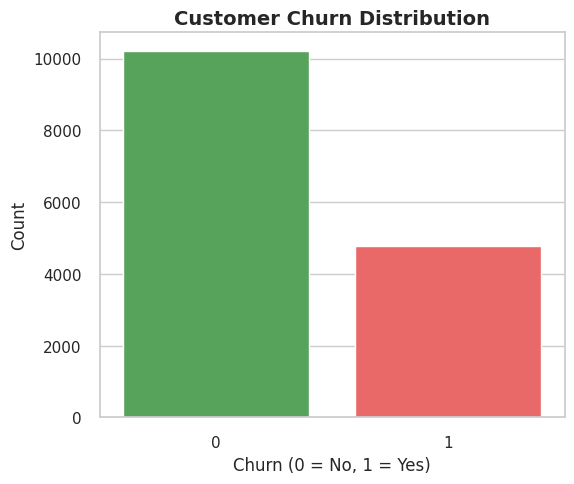

In [13]:
plt.figure(figsize=(6,5))

colors = ['#4CAF50', '#FF5252']

sns.countplot(data=df, x='churn', palette=colors)

plt.title("Customer Churn Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

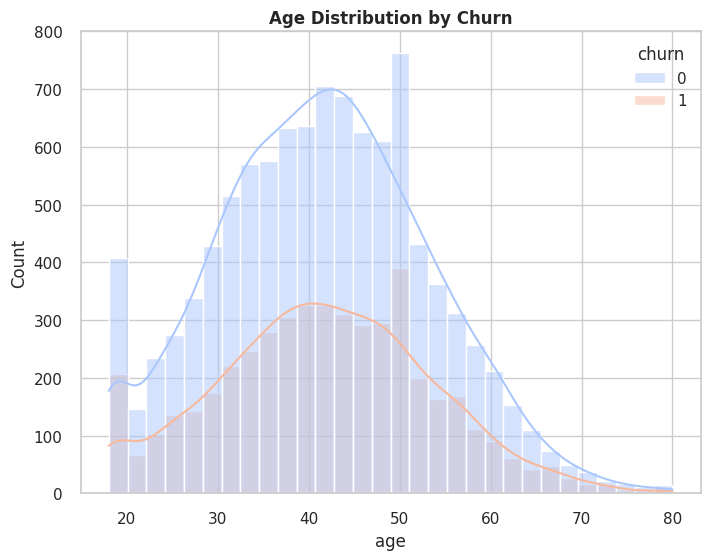

In [14]:
plt.figure(figsize=(8,6))

sns.histplot(data=df, x='age', hue='churn',
             bins=30, palette='coolwarm', kde=True)

plt.title("Age Distribution by Churn", fontweight='bold')
plt.show()

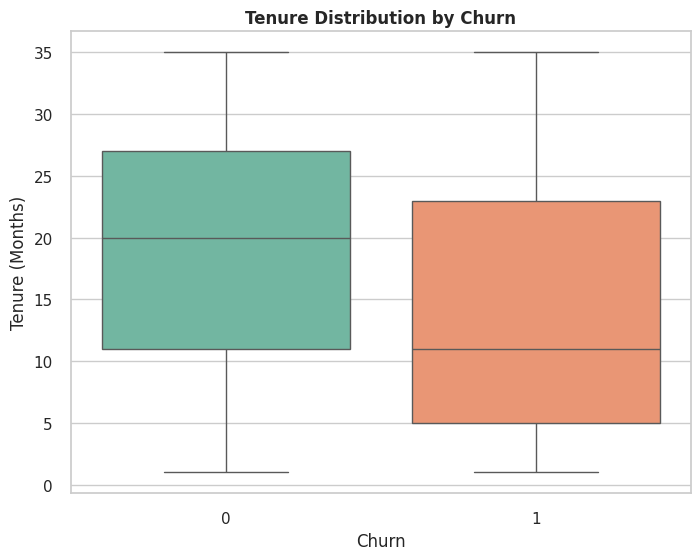

In [15]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df,
            x='churn',
            y='tenure_months',
            palette='Set2')

plt.title("Tenure Distribution by Churn", fontweight='bold')
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

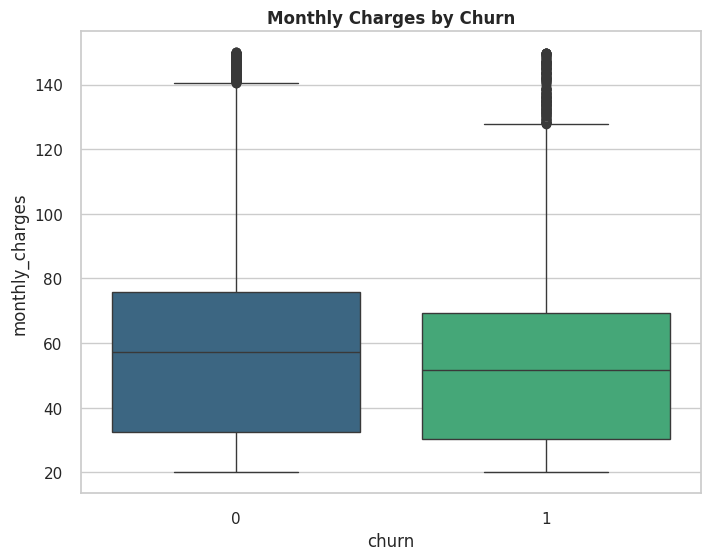

In [16]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df,
            x='churn',
            y='monthly_charges',
            palette='viridis')

plt.title("Monthly Charges by Churn", fontweight='bold')
plt.show()

<Figure size 800x600 with 0 Axes>

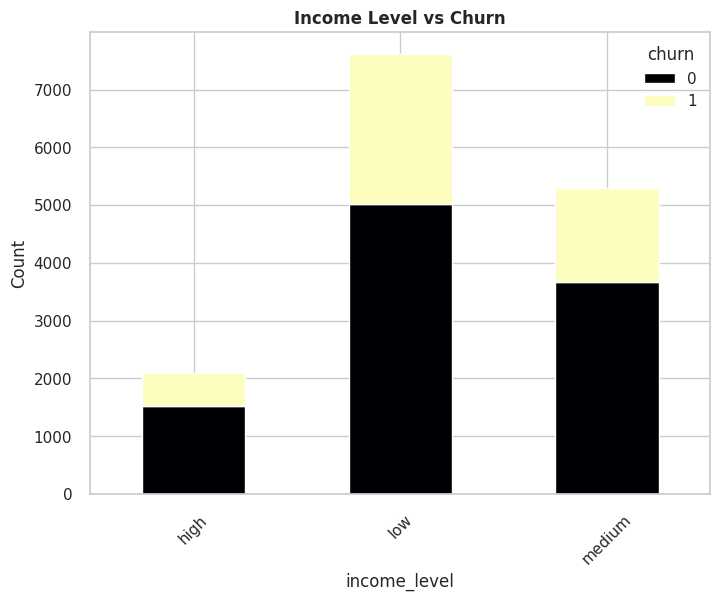

In [17]:
plt.figure(figsize=(8,6))

income_churn = pd.crosstab(df['income_level'], df['churn'])

income_churn.plot(kind='bar',
                  stacked=True,
                  colormap='magma',
                  figsize=(8,6))

plt.title("Income Level vs Churn", fontweight='bold')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

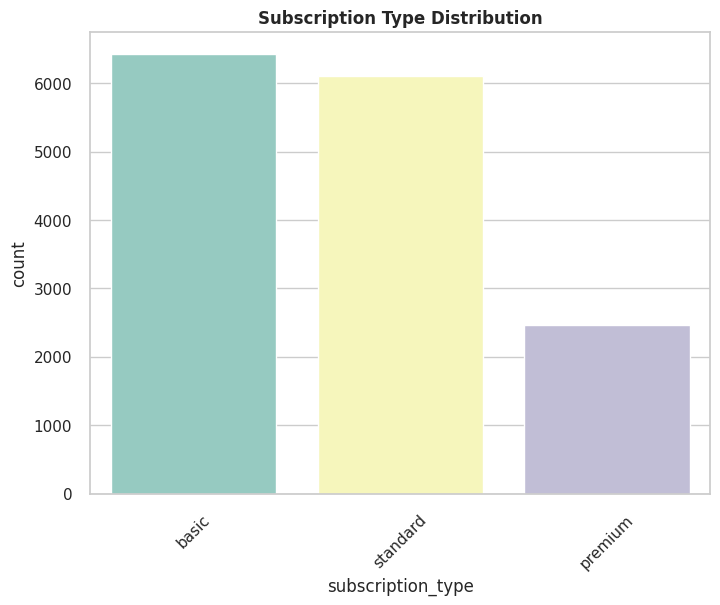

In [18]:
plt.figure(figsize=(8,6))

sns.countplot(data=df,
              x='subscription_type',
              palette='Set3')

plt.title("Subscription Type Distribution", fontweight='bold')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

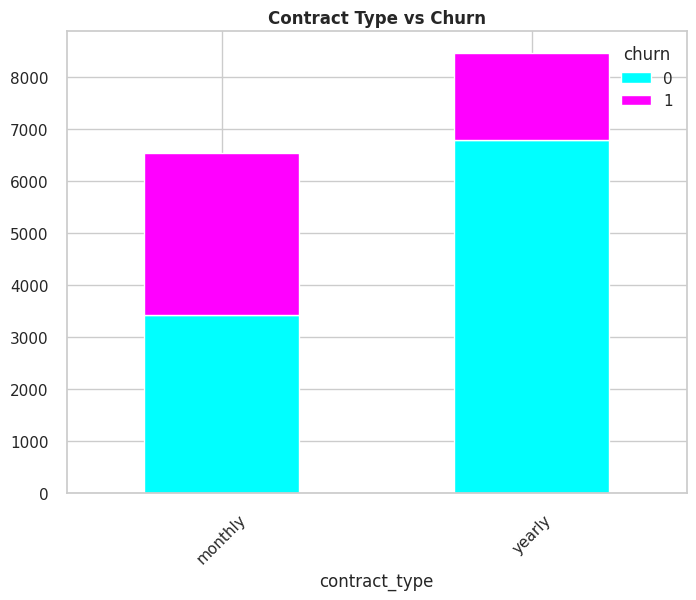

In [19]:
plt.figure(figsize=(8,6))

contract_churn = pd.crosstab(df['contract_type'], df['churn'])

contract_churn.plot(kind='bar',
                    stacked=True,
                    colormap='cool',
                    figsize=(8,6))

plt.title("Contract Type vs Churn", fontweight='bold')
plt.xticks(rotation=45)
plt.show()

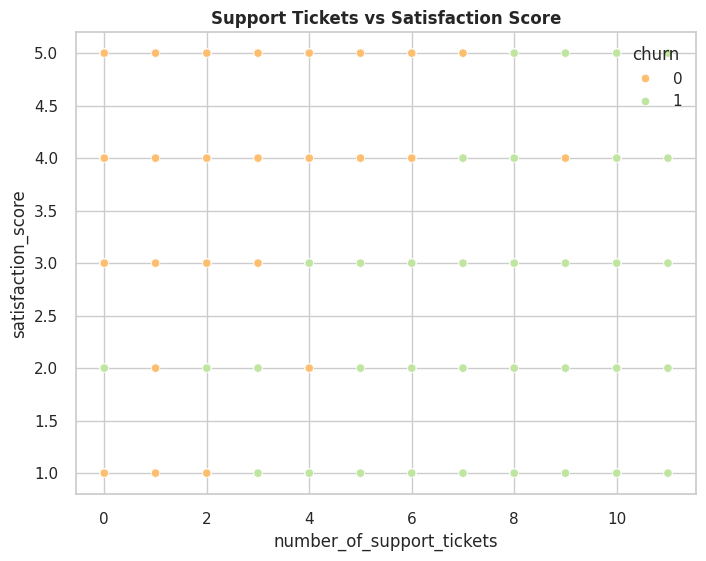

In [20]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,
                x='number_of_support_tickets',
                y='satisfaction_score',
                hue='churn',
                palette='Spectral')

plt.title("Support Tickets vs Satisfaction Score", fontweight='bold')
plt.show()

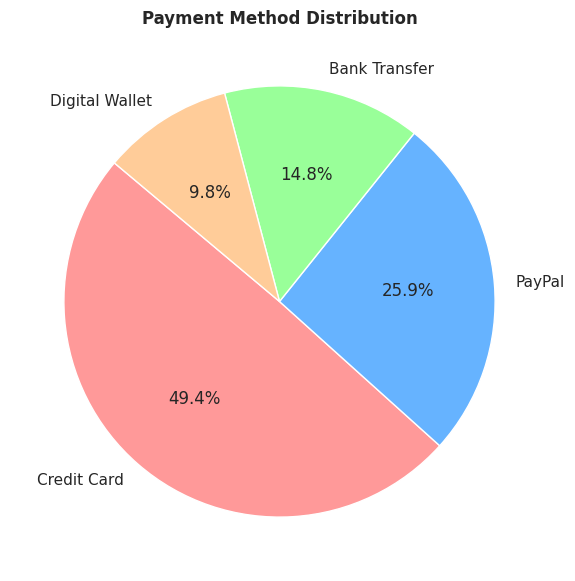

In [21]:
plt.figure(figsize=(7,7))

payment_counts = df['payment_method'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

plt.pie(payment_counts.values,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140)

plt.title("Payment Method Distribution", fontweight='bold')
plt.show()

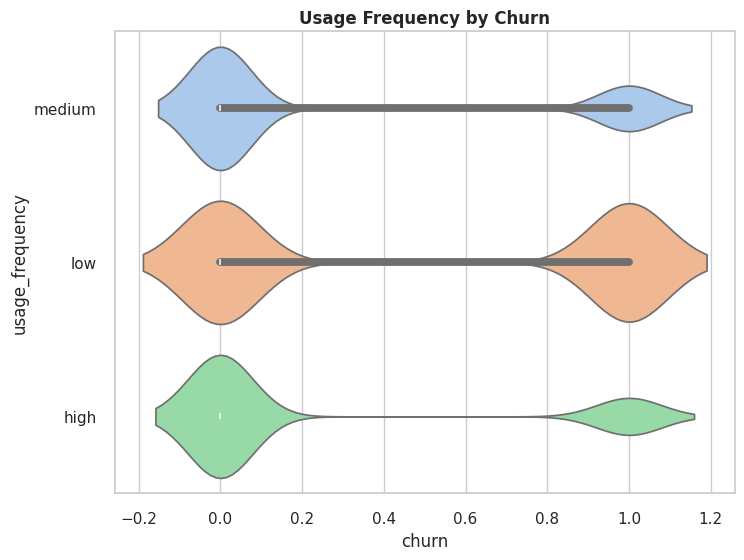

In [22]:
plt.figure(figsize=(8,6))

sns.violinplot(data=df,
               x='churn',
               y='usage_frequency',
               palette='pastel')

plt.title("Usage Frequency by Churn", fontweight='bold')
plt.show()

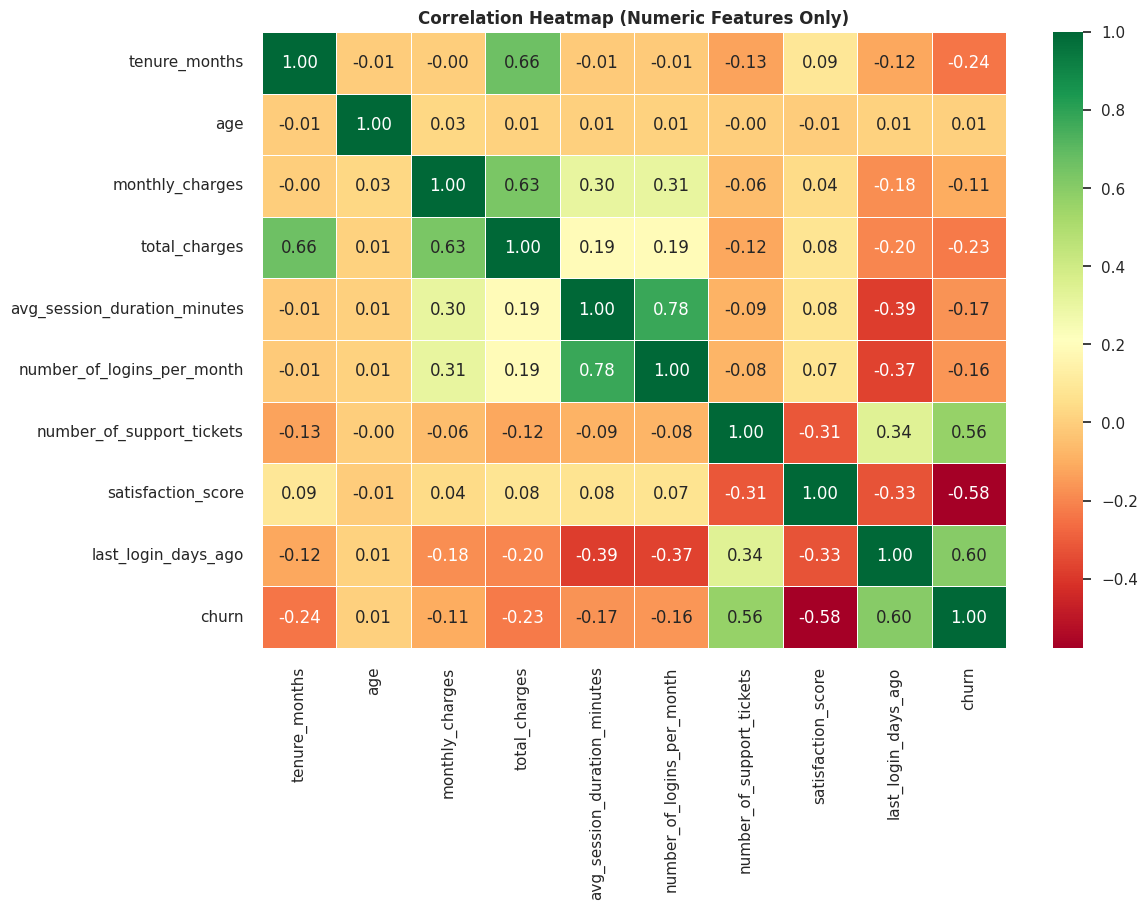

In [23]:
plt.figure(figsize=(12,8))

# Automatically select only numeric columns
corr = df.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(corr,
            annot=True,
            cmap='RdYlGn',
            fmt='.2f',
            linewidths=0.5)

plt.title("Correlation Heatmap (Numeric Features Only)", fontweight='bold')
plt.show()

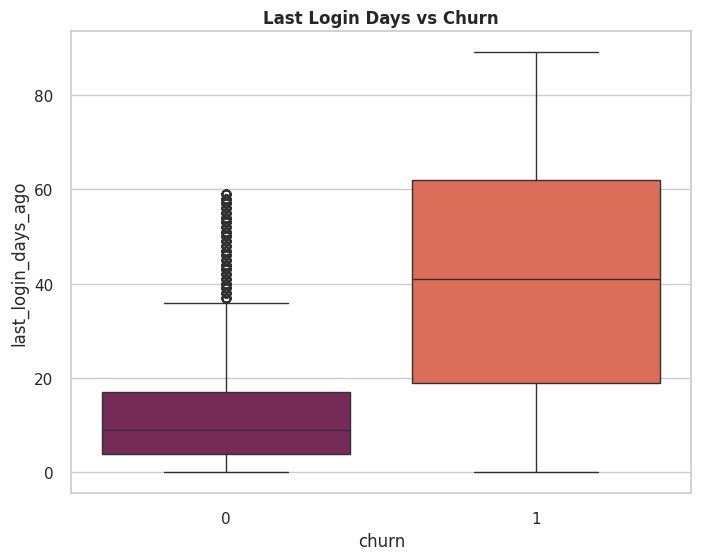

In [24]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df,
            x='churn',
            y='last_login_days_ago',
            palette='rocket')

plt.title("Last Login Days vs Churn", fontweight='bold')
plt.show()

## Feature engineering

## Import Required Libraries'

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Define Features & Target

In [26]:
X = df[['tenure_months','monthly_charges','total_charges',
        'avg_session_duration_minutes','number_of_logins_per_month',
        'number_of_support_tickets','satisfaction_score',
        'last_login_days_ago']]

y = df['churn']

## Train-Test Split (Stratified)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## Feature Scaling (For Distance-Based Models)

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define All ML Models

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier()
}

## Train & Evaluate All Models

In [30]:
results = {}

for name, model in models.items():
    
    # Use scaled data for specific models
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "Predictions": y_pred,
        "Probabilities": y_prob,
        "Model": model
    }
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2554
           1       0.90      0.84      0.87      1196

    accuracy                           0.92      3750
   macro avg       0.91      0.90      0.91      3750
weighted avg       0.92      0.92      0.92      3750


Decision Tree
Accuracy: 0.9312
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2554
           1       0.93      0.85      0.89      1196

    accuracy                           0.93      3750
   macro avg       0.93      0.91      0.92      3750
weighted avg       0.93      0.93      0.93      3750


Random Forest
Accuracy: 0.9314666666666667
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2554
           1       0.92      0.86      0.89      1196

    accuracy                           0.93      3750
   macro avg    

## Accuracy Comparison Table

In [31]:
results_df = pd.DataFrame(results).T

print("\nModel Accuracy Comparison:")
print(results_df['Accuracy'])


Model Accuracy Comparison:
Logistic Regression        0.92
Decision Tree            0.9312
Random Forest          0.931467
SVM                    0.930133
KNN                       0.916
Gradient Boosting      0.934133
Name: Accuracy, dtype: object


## Accuracy Bar Plot

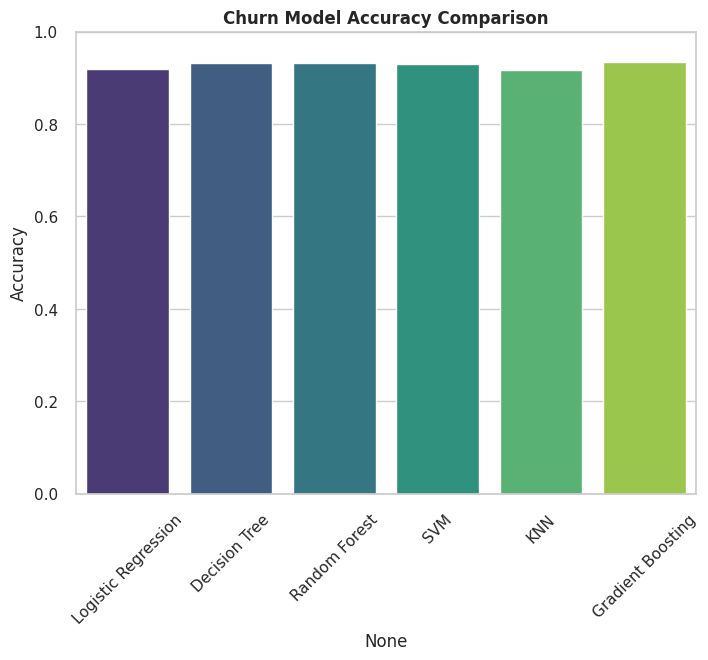

In [32]:
plt.figure(figsize=(8,6))

sns.barplot(x=results_df.index,
            y=results_df['Accuracy'],
            palette='viridis')

plt.title("Churn Model Accuracy Comparison", fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

## Confusion Matrix (Best Model)

Best Model: Gradient Boosting


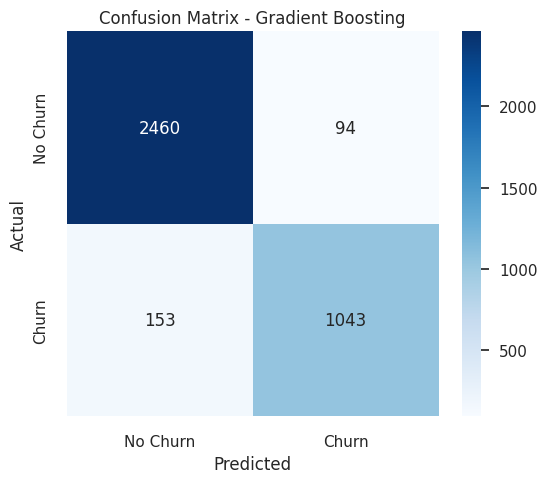

In [33]:
best_model_name = results_df['Accuracy'].idxmax()
print("Best Model:", best_model_name)

best_predictions = results[best_model_name]["Predictions"]

cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=["No Churn","Churn"],
            yticklabels=["No Churn","Churn"])

plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC Curve Comparison

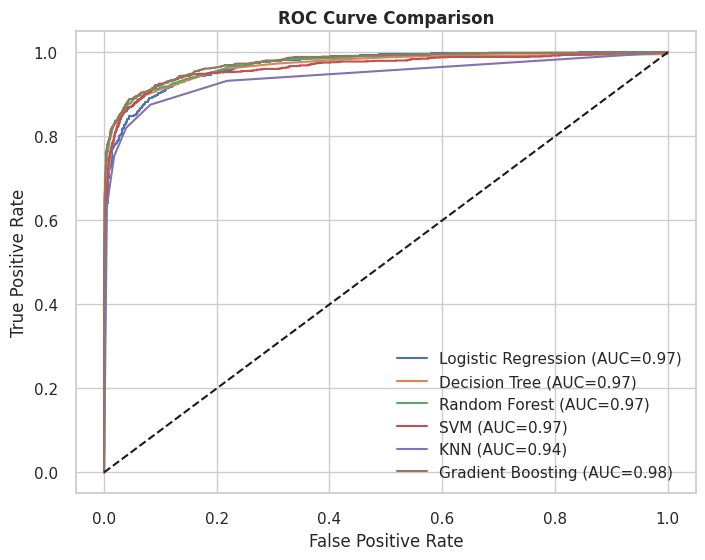

In [34]:
plt.figure(figsize=(8,6))

for name in results:
    fpr, tpr, _ = roc_curve(y_test, results[name]["Probabilities"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison", fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Feature Importance (Tree-Based Models)

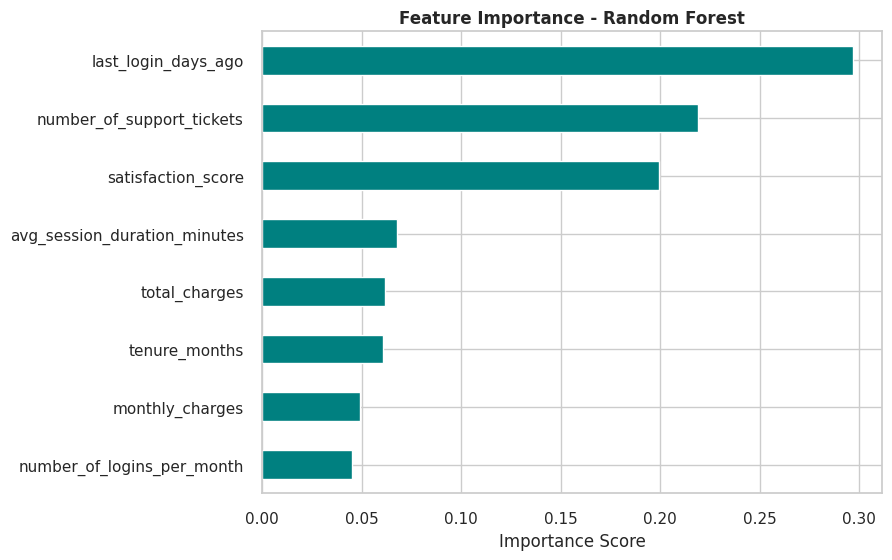

In [35]:
rf_model = results["Random Forest"]["Model"]

importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values()

plt.figure(figsize=(8,6))
importance.plot(kind='barh', color='teal')

plt.title("Feature Importance - Random Forest", fontweight='bold')
plt.xlabel("Importance Score")
plt.show()

## Thank you..pls upvote!!!